Consider the following differential equation

$$\dfrac{\mathrm{d}N(t)}{\mathrm{d}t}=\alpha N(t)\big(1-N(t) \big)$$

for $\alpha=0.5$. 

* Find analytically the functions that satisfy such relation and plot some of them.


* Now, consider the initial condition $N(0)=0.01$ and use Euler method with an appropriate value of $\delta t$.


* What is the amount of time that the system takes to reach $N=0.9$?


* If you consider a new initial condition $N(0)=2$, will the system reach $N=0.9$? Simulate this new solution. 


* The equation that we have seen is also called saturating population model. What is the difference with the exponential growth?
 $$\dfrac{\mathrm{d}N(t)}{\mathrm{d}t}=\alpha N(t) $$


In [1]:
import numpy as np
import numpy.matlib 
import math
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
## I define the family of functions that solves the considered differential equation
## The function f takes the instant of times considered (argument ts) and the constant (argument k) that is added beccause of 
## the integration process

def f(ts,k):
    
    alpha=0.5
    N=np.exp(alpha*ts+k)/(1+np.exp(alpha*ts+k))
    
    return N
    
    

Text(0, 0.5, 'N(t)')

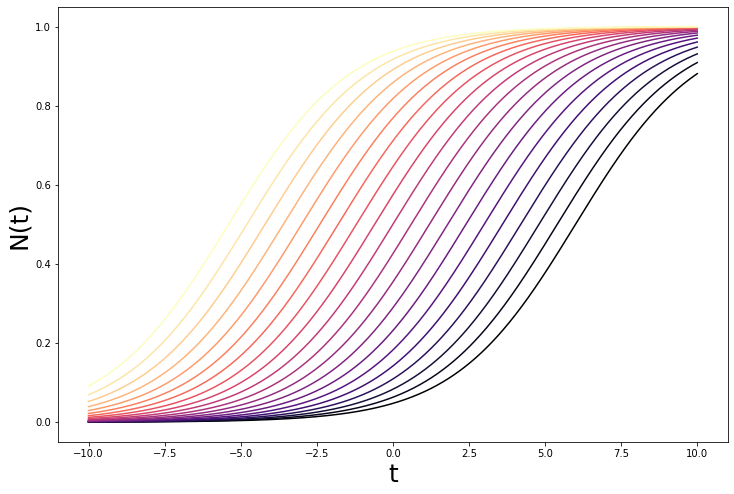

In [3]:
## In this cell, we plot the family of functions as the constant k varies

N_points=1000                         ## The number of points for the plot
ts=np.linspace(-10,10,N_points)         ## The instances of time considered


N_func=20                             ## The number of functions (solution of the differential equation) to plot
ks=0.3*np.arange(0,N_func)-3          ## The values of k for the different functions (you could choose any value of k in theory),
                                      ## but I selected these to have a nice result in the plot
    


colorset=cm.magma(np.linspace(0,1,N_func)) ## The colors that we will use for the different functions 

fig, ax = plt.subplots(figsize=(12, 8))    
plt.rcParams.update({'font.size': 20})     ## This is to set a new font size



## Now we plot iteratively the functions considered
for i in range(N_func):
    
    plt.plot(ts, f(ts,ks[i]),color=colorset[i,:])  ## Plot solution i with value of the constant k[i] and color colorset[i,:]
    

plt.xlabel('t',size=25)
plt.ylabel('N(t)',size=25)





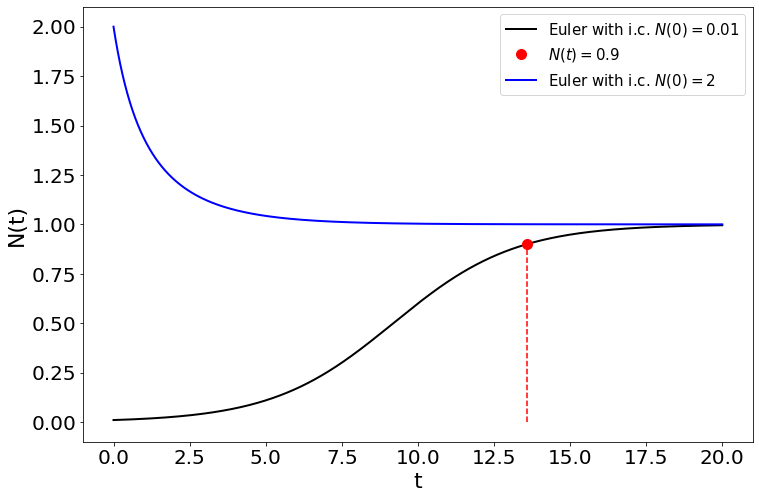

In [4]:
## Euler simulation

dt=0.001                  ## The discretization step dt for Euler' s method

T_max=20                  ## The maximum time considered

T=int(T_max/dt)           ## The number of instances (updates) used in Euler
ts=np.arange(0,T)*dt      ## The values of time used in Euler

N=np.zeros([T])           ## Initialisation of the variable N to iterate sequentially 
N[0]=0.01                 ## Initial condition

alpha=0.5                 ## Value of alpha considered in the exercise

## Iteration of Euler's method
for t in range(1,T):
    
    N[t]=N[t-1]+alpha*N[t-1]*(1-N[t-1])*dt
    
    if N[t]>=0.9 and N[t-1]<0.9:   ## To understand when the system reaches 0.9, we check when the value of N[t] is greater or
                                   ## equal than 0.9, but N[t-1] is less than 0.9
        
        T_pass=np.copy(t*dt)       ## The time at which the system reaches 0.9. We need to multiply the iteration variable t by
                                   ## dt to make this value independent on the discretisation step dt adopted
        

fig, ax = plt.subplots(figsize=(12, 8))    
plt.rcParams.update({'font.size': 15})         

p0,=plt.plot(ts,N,lw=2,color='black')  ## Plot of the solution achieved through Euler


p1,=plt.plot(T_pass,N[int(T_pass/dt)],'.',markersize=20,color='red') ## Plot of the point at which the system reaches 0.9
plt.plot([T_pass,T_pass],[0,N[int(T_pass/dt)]],'--',color='red')      ## Vertical line connected to the previous point


## We now do the same for the other initial codition N(0)=2


N_new=np.zeros([T])           ## Initialisation of the new variable N_new to iterate sequentially 
N_new[0]=2                    ## Initial condition

alpha=0.5                 ## Value of alpha considered in the exercise

## Iteration of Euler's method
for t in range(1,T):
    
    N_new[t]=N_new[t-1]+alpha*N_new[t-1]*(1-N_new[t-1])*dt
    
    
p2,=plt.plot(ts,N_new,lw=2,color='blue')  ## Plot of the solution achieved through Euler
plt.xlabel('t',size=22)
plt.ylabel('N(t)',size=22)

plt.legend([p0,p1,p2],['Euler with i.c. $N(0)=0.01$','$N(t)=0.9$','Euler with i.c. $N(0)=2$'])


Consider the following differential equation

$$\dfrac{\mathrm{d}x(t)}{\mathrm{d}t}=x^2-5x+6$$
 

* Find the equilibria and study their stability.

$$f(x)=x^2-5x+6$$

$$x_{eq}=3,2$$ 

$$\dfrac{\mathrm{d}f(x)}{\mathrm{d}x}=f^{(1)}(x)=2x-5$$

$$f^{(1)}(3)=1>0$$

$$f^{(1)}(2)=-1<0$$

Thus, $x_{eq}=3$ is unstable, while $x_{eq}=2$ is unstable



Consider the following differential equation

$$\dfrac{\mathrm{d}x(t)}{\mathrm{d}t}=\alpha x^2$$
 

* Find the equilibria and study their stability as $\alpha$ varies.

$$f(x)=\alpha x^2$$

$$x_{eq}=0$$

$$\dfrac{\mathrm{d}f(x)}{\mathrm{d}x}=f^{(1)}(x)=2\alpha x$$

$$f^{(1)}(0)=0$$

We need to take a look at the second order derivative


$$f^{(2)}(x)=\dfrac{\mathrm{d}}{\mathrm{d}x}f^{(1)}(x)=2\alpha$$

$$f^{(2)}(0)=2\alpha$$

Thus, $x_{eq}=0$ is stable for $\alpha<0$ and unstable for $\alpha>0$


